# Debugging bench

In [13]:
!make clean; make

rm -rf *.exe
CC -g -fopenmp -O2 -I../include mat_mult_float.cpp -o mat_mult_float.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_double.cpp -o mat_mult_double.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_prefetch.cpp -o mat_mult_prefetch.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_local.cpp -o mat_mult_local.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_AT.cpp -o mat_mult_AT.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_BT.cpp -o mat_mult_BT.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_tile_AT.cpp -o mat_mult_tile_AT.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_tile_BT.cpp -o mat_mult_tile_BT.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_tile_vector_BT.cpp -o mat_mult_tile_vector_BT.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_tile_local_BT.cpp -o mat_mult_tile_local_BT.exe -lOpenCL
CC -g -fopenmp -O2 -I../include mat_mult_tile_local_vector_BT.cpp -o mat_mult_tile_local_vector_BT.exe -lOpenCL
CC -g -fopenmp -O

In [3]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../include"))
import subprocess
import json
import py_helper

%matplotlib widget

defines=py_helper.load_defines("mat_size.hpp")

NCOLS_A = defines["NCOLS_A"]
NROWS_C = defines["NROWS_C"]
NCOLS_C = defines["NCOLS_C"]

# A is of size (NROWS_C, NCOLS_A)
# B is of size (NCOLS_A, NCOLS_C)    
# C is of size (NROWS_C, NCOLS_C)

mat_mul_double=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float64)
mat_mul_float=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float32)

# Make up objects for timing results and local optimisation
timings=py_helper.TimingResults()
local_opt=py_helper.LocalOpt()

	               name: gfx1035 
	 global memory size: 536 MB
	    max buffer size: 456 MB
	     max local size: (1024,1024,1024)
	     max work-items: 256
Time for kernel was 19.619 ms
Maximum error (infinity norm) is: 6.10352e-05


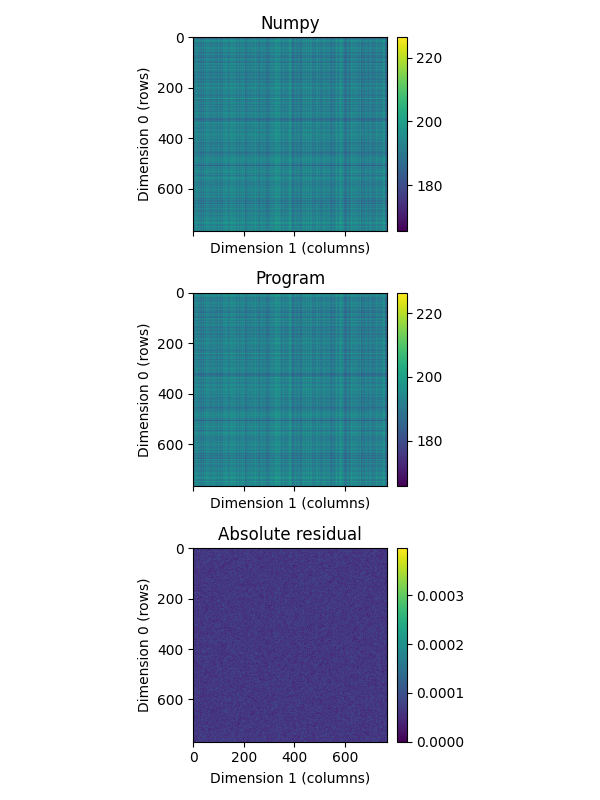

In [4]:
subprocess.run(["./mat_mult_local_A.exe", "-gpu"])
mat_mul_float.load_data()
mat_mul_float.check_data()